In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

import pandas as pd
import seaborn as sns

## Setup

In [22]:
# Pipeline params
DATA_DIR = '../../data'
BASE_DATASET =  f'{DATA_DIR}/hydropower_efficiency.discretized_labels.csv'

In [13]:
# Load and split dataset 
base_df = pd.read_csv(BASE_DATASET)
base_df.drop('plant_id', axis=1, inplace=True)
base_df.drop('type', axis=1, inplace=True)

In [19]:
cont_df = base_df.drop('grade', axis=1)
disc_df = base_df.drop('gwh_per_mm3', axis=1)

## Initial selection (correlation)

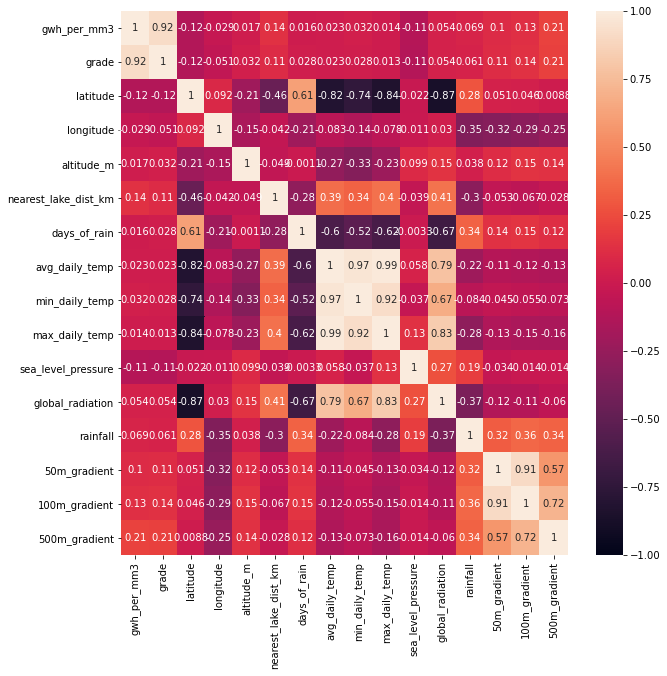

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(base_df.corr(), vmin=-1, vmax=1.0, annot=True)

### Decisions:
- Will remove min_daily_temp, max_daily_temp, global_radiation, 50m_gradient

## Logistic regression; L2 regularization 

In [24]:
cont_df.columns

Index(['gwh_per_mm3', 'latitude', 'longitude', 'altitude_m',
       'nearest_lake_dist_km', 'days_of_rain', 'avg_daily_temp',
       'min_daily_temp', 'max_daily_temp', 'sea_level_pressure',
       'global_radiation', 'rainfall', '50m_gradient', '100m_gradient',
       '500m_gradient'],
      dtype='object')

In [25]:
SEED = 1
ATTRIBUTES = [
    "altitude_m",
    "nearest_lake_dist_km",
    "days_of_rain",
    "avg_daily_temp",
    "sea_level_pressure",
    "100m_gradient",
    "500m_gradient"
]

In [26]:
X, y = base_df.drop('gwh_per_mm3', axis=1), base_df['gwh_per_mm3']
X = X[ATTRIBUTES]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=SEED)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

In [27]:
scaler = preprocessing.MinMaxScaler()
X_train[ATTRIBUTES] = scaler.fit_transform(X_train[ATTRIBUTES])
X_val[ATTRIBUTES] = scaler.transform(X_val[ATTRIBUTES])

### Training

In [ ]:
from sklearn.metrics import r2_score
def train_and_evaluate_model(X_train, y_train, X_val, y_val, algorithm, save_path): #algorithm = constructed algorithm
    model = algorithm.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train, squared = False)
    r2_train = r2_score(y_train, y_pred_train)
    
    y_pred_val = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val, squared = False)
    r2_val = r2_score(y_val, y_pred_val)
    
    plt.scatter(y_pred_val, y_val, marker = 'o')
    plt.xlabel('Predicted Plant Efficiency (Annual Generation in GWh per mm^3)')
    plt.ylabel('True Plant Efficiency (Annual Generation in GWh per mm^3)')
#     plt.xlim(0, 10)
#     plt.ylim(0, 10)
    plt.savefig('../results/baseline_plots/' + save_path + '.png')
    
    return mse_train, r2_train, mse_val, r2_val 